# Exploratory Data Analysis

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import seaborn as sns
sns.set_theme(style='white')

# Load Dataset

In [5]:
tracks = pd.read_csv('../../Dataset/tracks.csv')
tracks.head()

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,35iwgR4jXetI318WEWsa1Q,Carve,6,126903,0,['Uli'],['45tIt06XoI0Iio4LBEVpls'],1922-02-22,0.645,0.4450,0,-13.338,1,0.4510,0.674,0.7440,0.151,0.127,104.851,3
1,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,98200,0,['Fernando Pessoa'],['14jtPCOoNZwquk5wd9DxrY'],1922-06-01,0.695,0.2630,0,-22.136,1,0.9570,0.797,0.0000,0.148,0.655,102.009,1
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,181640,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.434,0.1770,1,-21.180,1,0.0512,0.994,0.0218,0.212,0.457,130.418,5
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,176907,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.321,0.0946,7,-27.961,1,0.0504,0.995,0.9180,0.104,0.397,169.980,3
4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,163080,0,['Dick Haymes'],['3BiJGZsyX9sJchTqcSA7Su'],1922,0.402,0.1580,3,-16.900,0,0.0390,0.989,0.1300,0.311,0.196,103.220,4


# Delete tracks before 1980

In [6]:
tracks['release_date'] = np.where(tracks['release_date'].str.len() > 4, tracks['release_date'].str.slice(start=0, stop=4), tracks['release_date']).astype(str).astype(int)
before1980 = tracks[tracks['release_date'].astype(int) < 1980].index
tracks.drop(before1980, inplace=True)
tracks = tracks.reset_index(drop=True)

# EDA

In [7]:
tracks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 403501 entries, 0 to 403500
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                403501 non-null  object 
 1   name              403498 non-null  object 
 2   popularity        403501 non-null  int64  
 3   duration_ms       403501 non-null  int64  
 4   explicit          403501 non-null  int64  
 5   artists           403501 non-null  object 
 6   id_artists        403501 non-null  object 
 7   release_date      403501 non-null  int32  
 8   danceability      403501 non-null  float64
 9   energy            403501 non-null  float64
 10  key               403501 non-null  int64  
 11  loudness          403501 non-null  float64
 12  mode              403501 non-null  int64  
 13  speechiness       403501 non-null  float64
 14  acousticness      403501 non-null  float64
 15  instrumentalness  403501 non-null  float64
 16  liveness          40

In [8]:
tracks.isnull().sum()

id                  0
name                3
popularity          0
duration_ms         0
explicit            0
artists             0
id_artists          0
release_date        0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
dtype: int64

In [9]:
tracks.duplicated().value_counts()

False    403501
dtype: int64

In [10]:
tracks.shape

(403501, 20)

In [ ]:
sns.displot(track.popularity, color="b", bins=20)

In [11]:
tracks.describe().T

,count,mean,std,min,25%,50%,75%,max
popularity,403501.0,33.380054,16.990491,0.0,21.0000,34.000000,45.00000,100.000
duration_ms,403501.0,234799.468428,114730.720434,4937.0,187920.0000,226200.000000,269413.00000,5403500.000
explicit,403501.0,0.063534,0.243921,0.0,0.0000,0.000000,0.00000,1.000
release_date,403501.0,2001.326294,11.943512,1980.0,1991.0000,2001.000000,2012.00000,2021.000
danceability,403501.0,0.588181,0.161411,0.0,0.4850,0.602000,0.70500,0.991
energy,403501.0,0.610385,0.232458,0.0,0.4460,0.632000,0.80200,1.000
key,403501.0,5.272079,3.552368,0.0,2.0000,5.000000,9.00000,11.000
loudness,403501.0,-9.004966,4.502503,-60.0,-11.2950,-8.049000,-5.83100,2.854
mode,403501.0,0.638378,0.480471,0.0,0.0000,1.000000,1.00000,1.000
speechiness,403501.0,0.102005,0.168458,0.0,0.0334,0.044300,0.07940,0.969


Top 10 most popular songs on Spotify

In [12]:
most = tracks.query('popularity > 90', inplace = False).sort_values('popularity', ascending = False)
most[:10]

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
40656,4iJyoBOLtHqaGxP12qzhQI,Peaches (feat. Daniel Caesar & Giveon),100,198082,1,"['Justin Bieber', 'Daniel Caesar', 'Giveon']","['1uNFoZAHBGtllmzznpCI3s', '20wkVLutqVOYrc0kxF...",2021,0.677,0.696,0,-6.181,1,0.1190,0.32100,0.000000,0.4200,0.464,90.030,4
40657,7lPN2DXiMsVn7XUKtOW1CS,drivers license,99,242014,1,['Olivia Rodrigo'],['1McMsnEElThX1knmY4oliG'],2021,0.585,0.436,10,-8.761,1,0.0601,0.72100,0.000013,0.1050,0.132,143.874,4
40658,3Ofmpyhv5UAQ70mENzB277,Astronaut In The Ocean,98,132780,0,['Masked Wolf'],['1uU7g3DNSbsu0QjSEqZtEd'],2021,0.778,0.695,4,-6.865,0,0.0913,0.17500,0.000000,0.1500,0.472,149.996,4
39664,5QO79kh1waicV47BqGRL3g,Save Your Tears,97,215627,1,['The Weeknd'],['1Xyo4u8uXC1ZmMpatF05PJ'],2020,0.680,0.826,0,-5.487,1,0.0309,0.02120,0.000012,0.5430,0.644,118.051,4
39665,6tDDoYIxWvMLTdKpjFkc1B,telepatía,97,160191,0,['Kali Uchis'],['1U1el3k54VvEUzo3ybLPlM'],2020,0.653,0.524,11,-9.016,0,0.0502,0.11200,0.000000,0.2030,0.553,83.970,4
39667,0VjIjW4GlUZAMYd2vXMi3b,Blinding Lights,96,200040,0,['The Weeknd'],['1Xyo4u8uXC1ZmMpatF05PJ'],2020,0.514,0.730,1,-5.934,1,0.0598,0.00146,0.000095,0.0897,0.334,171.005,4
40659,7MAibcTli4IisCtbHKrGMh,Leave The Door Open,96,242096,0,"['Bruno Mars', 'Anderson .Paak', 'Silk Sonic']","['0du5cEVh5yTK9QJze8zA0C', '3jK9MiCrA42lLAdMGU...",2021,0.586,0.616,5,-7.964,1,0.0324,0.18200,0.000000,0.0927,0.719,148.088,4
39668,6f3Slt0GbA2bPZlz0aIFXN,The Business,95,164000,0,['Tiësto'],['2o5jDhtHVPhrJdv3cEQ99Z'],2020,0.798,0.620,8,-7.079,0,0.2320,0.41400,0.019200,0.1120,0.235,120.031,4
38721,60ynsPSSKe6O3sfwRnIBRf,Streets,94,226987,1,['Doja Cat'],['5cj0lLjcoR7YOSnhnX0Po5'],2019,0.749,0.463,11,-8.433,1,0.0828,0.20800,0.037100,0.3370,0.190,90.028,4
39670,3FAJ6O0NOHQV8Mc5Ri6ENp,Heartbreak Anniversary,94,198371,0,['Giveon'],['4fxd5Ee7UefO4CUXgwJ7IP'],2020,0.449,0.465,0,-8.964,1,0.0791,0.52400,0.000001,0.3030,0.543,89.087,3


Top 10 least popular songs on Spotify

In [13]:
least = tracks.sort_values('popularity', ascending = True).head(10)
least

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
24342,5QCarBaFZk4GLje87UAdWI,Cback Theme,0,254825,0,['Dm Moon'],['48qSqENQge2geuTQhXzRQu'],2018,0.804,0.980,7,-7.095,1,0.0478,0.00325,0.770000,0.2400,0.590,120.010,4
146204,2tyv0MxHqOTGn7IlBy3FdM,You Mend,0,246920,0,['Anna Shannon'],['0z3lB6xqNa6pY7WkB01rq9'],1999,0.762,0.451,2,-8.399,0,0.0406,0.84200,0.000010,0.0849,0.584,118.099,4
146203,2irUG5JJTKAN5t41VO3dAI,Danny Boy - Live,0,281173,0,['Clay Blaker'],['3nqVWAvbzRsMlhiyTcQO84'],2017,0.224,0.320,11,-11.231,1,0.0320,0.75700,0.110000,0.1390,0.139,65.412,4
146202,1fLwXctmmpkOoW7Wq34Qyb,Crazy Arms - Live,0,207813,0,"['Clay Blaker', 'The Texas Honky-Tonk Band']","['3nqVWAvbzRsMlhiyTcQO84', '6cYCCKvpMh0VtXGgKc...",2017,0.335,0.745,4,-4.789,1,0.1800,0.64400,0.005100,0.7510,0.723,132.576,4
146201,18Rop3rBXPV89Lj4JPT2EH,Roly Poly - Live,0,129560,0,['Clay Blaker'],['3nqVWAvbzRsMlhiyTcQO84'],2017,0.507,0.595,4,-12.102,1,0.0518,0.96300,0.117000,0.6040,0.953,110.447,4
146200,4STkqwDAmywSCOGQ8g9YMm,The Line,0,197800,0,['Anna Shannon'],['0z3lB6xqNa6pY7WkB01rq9'],1999,0.770,0.209,9,-15.391,0,0.0582,0.96200,0.000666,0.1120,0.325,115.456,4
146199,22YIsN51JGOWkEcX1jPDBH,Lonesome Rodeo Cowboy - Live,0,205933,0,"['Clay Blaker', 'The Texas Honky-Tonk Band']","['3nqVWAvbzRsMlhiyTcQO84', '6cYCCKvpMh0VtXGgKc...",2017,0.695,0.638,7,-8.092,1,0.0714,0.73500,0.000028,0.1090,0.729,125.564,4
146198,2Ekkvc3C3Cr3DYtVjCdZE8,The Game - Bubling Remix,0,181013,0,['DJ Galaga'],['6QPnWIQnzQvsTMAaOJe3EZ'],2013,0.685,0.908,11,-5.814,0,0.1030,0.01170,0.090900,0.4400,0.739,144.043,4
389295,4NJut5xzQNtQShhWMbDcQI,The Gypsy Princess (Die Csárdásfürstin) / Act ...,0,369547,0,"['Emmerich Kálmán', 'Ingeborg Schöpf', 'Piotr ...","['4raX5tsCEWJkpseoWkjv2R', '45p7PoaBlZY7MZGVcq...",2012,0.225,0.106,0,-22.647,0,0.0795,0.91400,0.000009,0.6810,0.126,169.581,4
146197,7rkKckHzhna4T90KajMQc8,Fat Cat,0,162267,0,['Anna Shannon'],['0z3lB6xqNa6pY7WkB01rq9'],1999,0.779,0.342,2,-9.455,0,0.0389,0.80400,0.000091,0.3000,0.805,128.031,4


Correlation Matrix

In [14]:
corr = tracks.corr()
cmap = sns.diverging_palette(230, 20, as_cmap=True)

C:\Users\abdur\AppData\Local\Temp\ipykernel_15548\913462157.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = tracks.corr()


C:\Users\abdur\AppData\Local\Temp\ipykernel_15548\1860167949.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(tracks.corr(), annot=True, fmt='.1g', vmin=-1, vmax=1, center= 0, cmap=cmap)


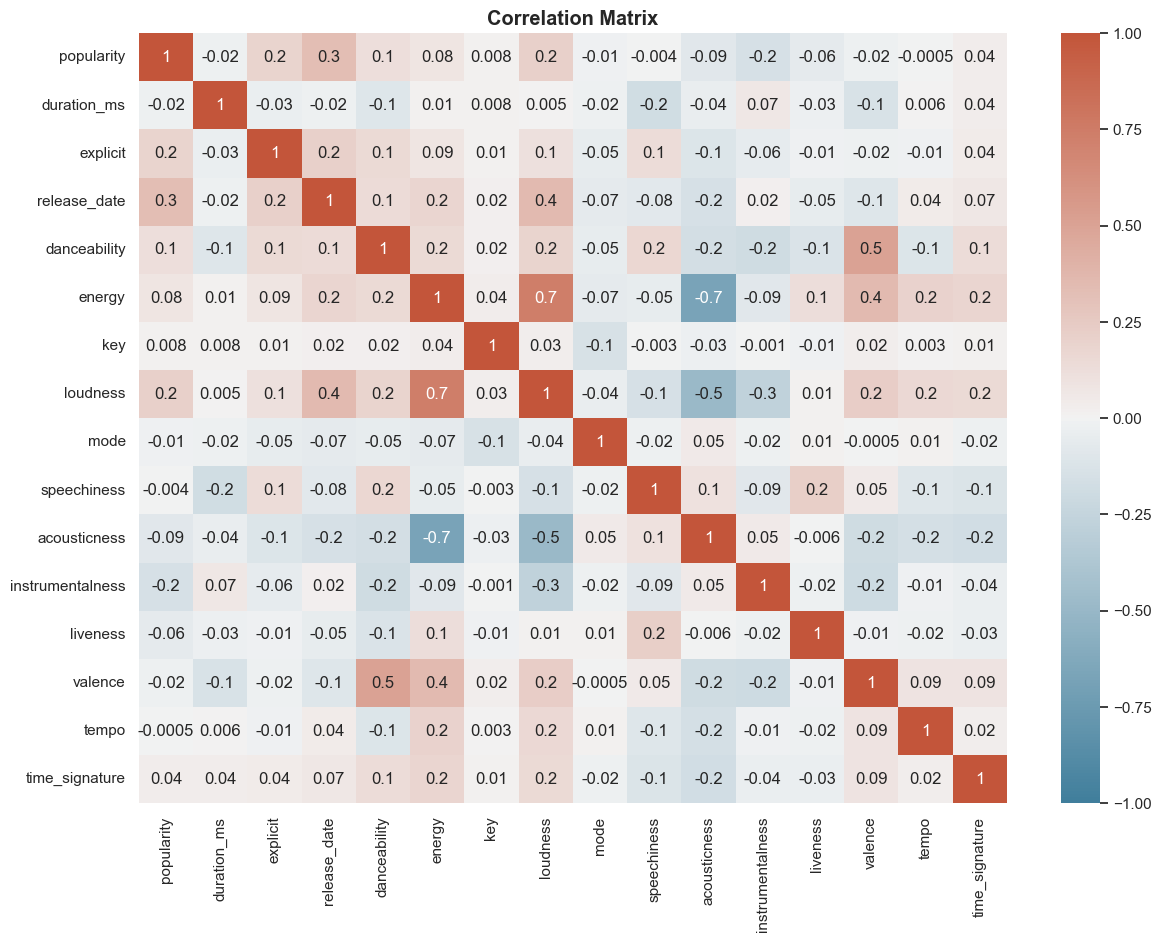

In [15]:
plt.figure(figsize=(14,10))
sns.heatmap(tracks.corr(), annot=True, fmt='.1g', vmin=-1, vmax=1, center= 0, cmap=cmap)
plt.title("Correlation Matrix", fontweight='bold', fontsize='large')
plt.show()

In [16]:
corr_mat = tracks.corr()
corr_pairs = corr_mat.unstack()
pos_corr = corr_pairs[(corr_pairs >= 0.5) & (corr_pairs < 1)]
print("Strong Positive Correlation is observed in the following pairs: \n", pos_corr)

neg_corr = corr_pairs[(corr_pairs <= -0.5) & (corr_pairs > -1)]
print("\nStrong Negative Correlation is observed in the following pairs: \n", neg_corr)

C:\Users\abdur\AppData\Local\Temp\ipykernel_15548\200142203.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_mat = tracks.corr()


Strong Positive Correlation is observed in the following pairs: 
 danceability  valence         0.505154
energy        loudness        0.737431
loudness      energy          0.737431
valence       danceability    0.505154
dtype: float64

Strong Negative Correlation is observed in the following pairs: 
 energy        acousticness   -0.673083
acousticness  energy         -0.673083
dtype: float64


C:\Users\abdur\AppData\Local\Temp\ipykernel_15548\2093748591.py:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<AxesSubplot: >

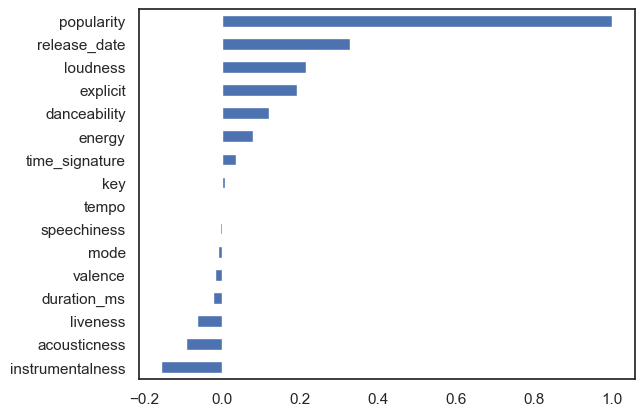

In [32]:
tracks.corr()["popularity"].sort_values().plot.barh()

**Selecting a small piece of data from dataset**

In [26]:
sam = tracks.sample(int(0.004 * len(tracks)))
len(sam)

1614

Regression plot - Correlation between Loudness and Energy

[Text(0.5, 1.0, 'Loudness vs Energy Correlation')]

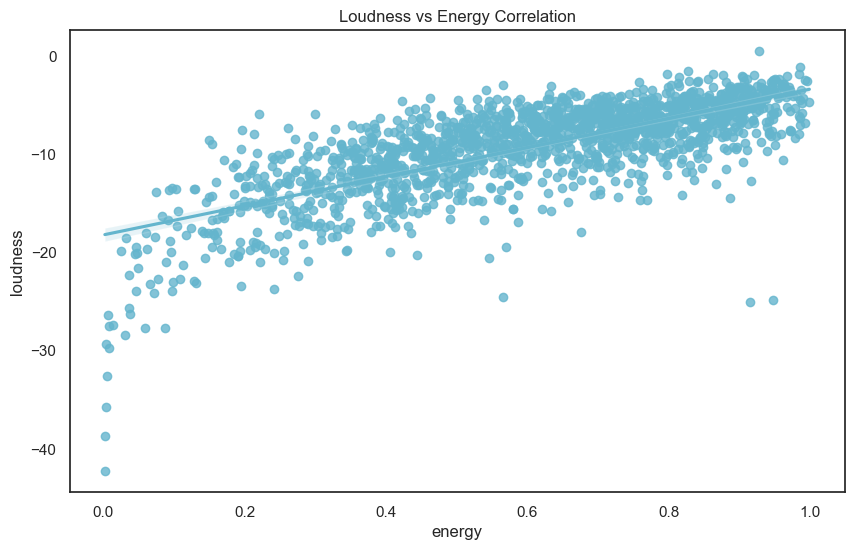

In [27]:
plt.figure(figsize=(10,6))
sns.regplot(data=sam, y='loudness', x='energy', color='c').set(title='Loudness vs Energy Correlation')

**Regression plot - Correlation between Popularity and Acousticness**

[Text(0.5, 1.0, 'Popularity vs Acousticness Correlation')]

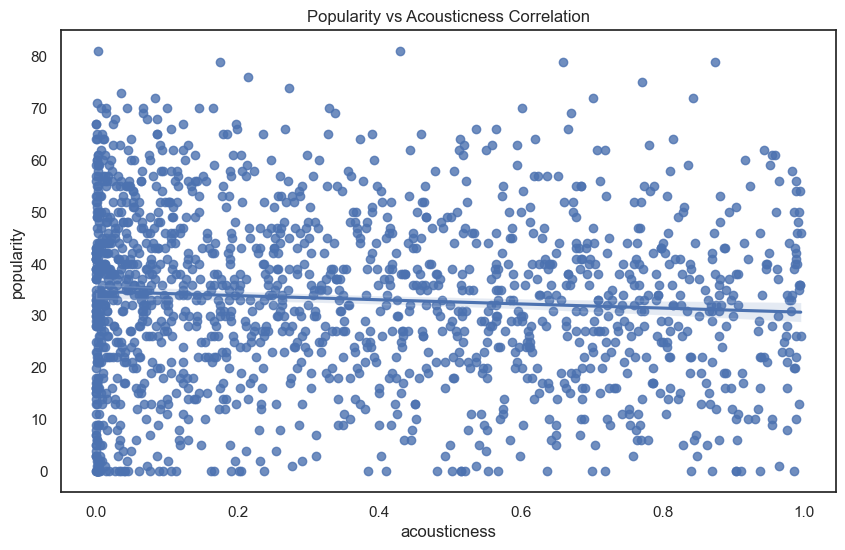

In [28]:
plt.figure(figsize=(10,6))
sns.regplot(data=sam, y='popularity', x='acousticness', color='b').set(title='Popularity vs Acousticness Correlation')

**Distibution plot - Visualize total number of songs on Spotify since 1992**

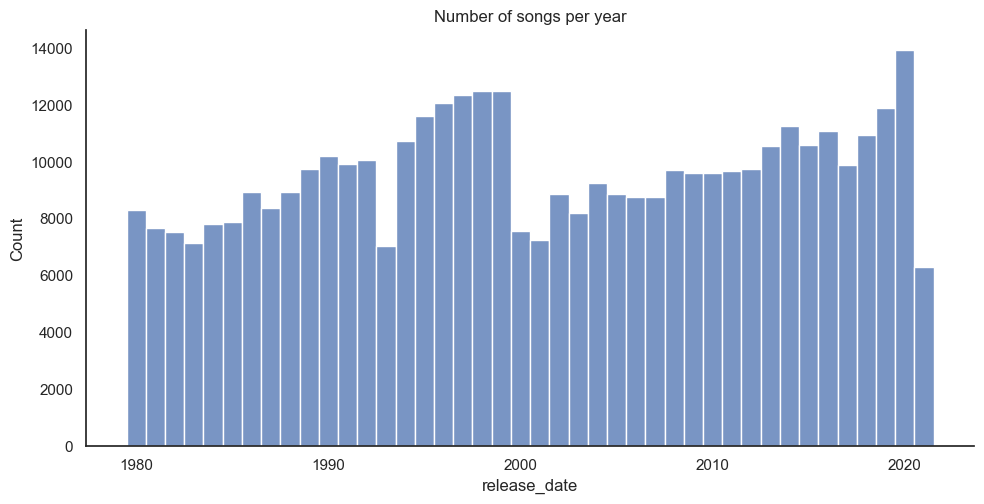

In [29]:
sns.displot(tracks.release_date, discrete=True, aspect=2, height=5, kind='hist').set(title='Number of songs per year')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41]),
 [Text(0, 0, '1980'),
  Text(1, 0, '1981'),
  Text(2, 0, '1982'),
  Text(3, 0, '1983'),
  Text(4, 0, '1984'),
  Text(5, 0, '1985'),
  Text(6, 0, '1986'),
  Text(7, 0, '1987'),
  Text(8, 0, '1988'),
  Text(9, 0, '1989'),
  Text(10, 0, '1990'),
  Text(11, 0, '1991'),
  Text(12, 0, '1992'),
  Text(13, 0, '1993'),
  Text(14, 0, '1994'),
  Text(15, 0, '1995'),
  Text(16, 0, '1996'),
  Text(17, 0, '1997'),
  Text(18, 0, '1998'),
  Text(19, 0, '1999'),
  Text(20, 0, '2000'),
  Text(21, 0, '2001'),
  Text(22, 0, '2002'),
  Text(23, 0, '2003'),
  Text(24, 0, '2004'),
  Text(25, 0, '2005'),
  Text(26, 0, '2006'),
  Text(27, 0, '2007'),
  Text(28, 0, '2008'),
  Text(29, 0, '2009'),
  Text(30, 0, '2010'),
  Text(31, 0, '2011'),
  Text(32, 0, '2012'),
  Text(33, 0, '2013'),
  Text(34, 0, '2014'),
  Text(35, 

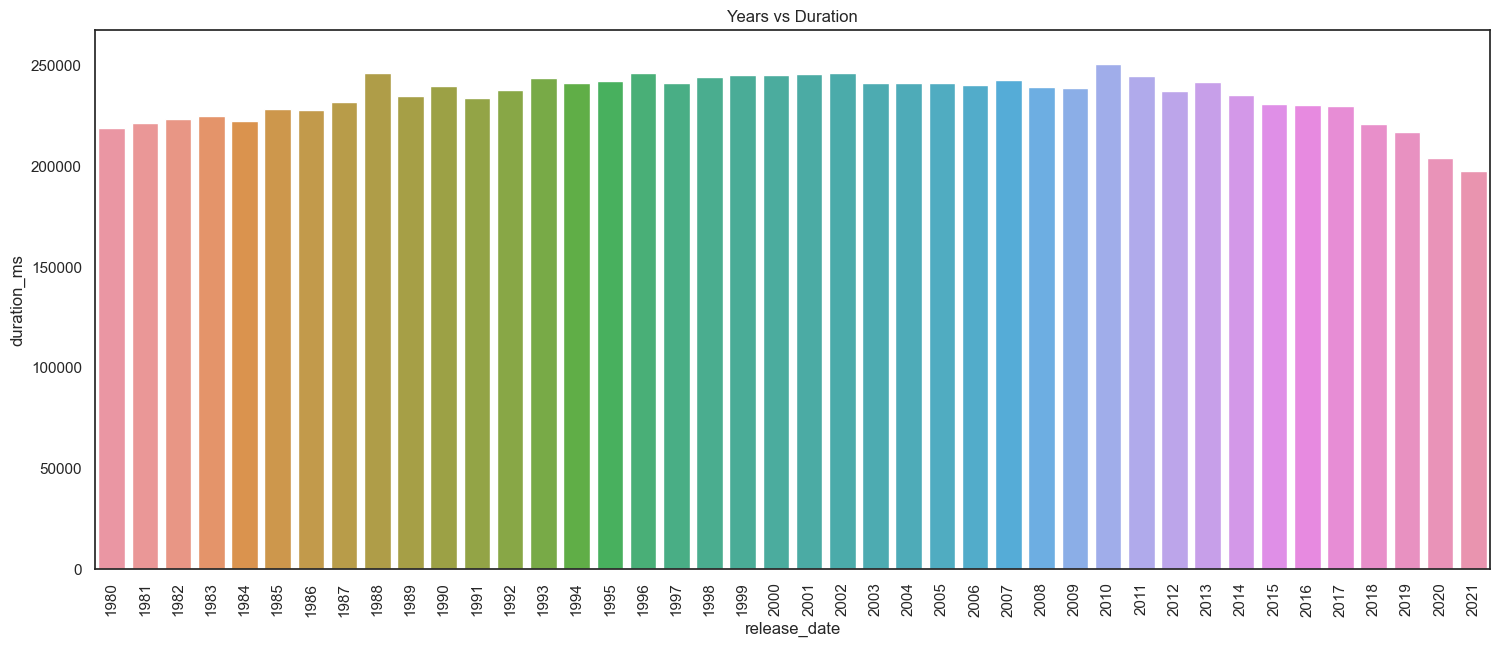

In [31]:
total_dr = tracks.duration_ms
fig_dims = (18,7)
fig, ax = plt.subplots(figsize=fig_dims)
fig = sns.barplot(x = tracks.release_date, y = total_dr, ax = ax, errwidth = False).set(title='Years vs Duration')
plt.xticks(rotation=90)

**Boxplots** 
*	Plotting boxplots without outliers included. To turn on outliers set 'showfliers' to True.

In [17]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
newdf = tracks.select_dtypes(include=numerics)
l = newdf.columns.values
len(l)

16

IndexError: index 3 is out of bounds for axis 0 with size 3

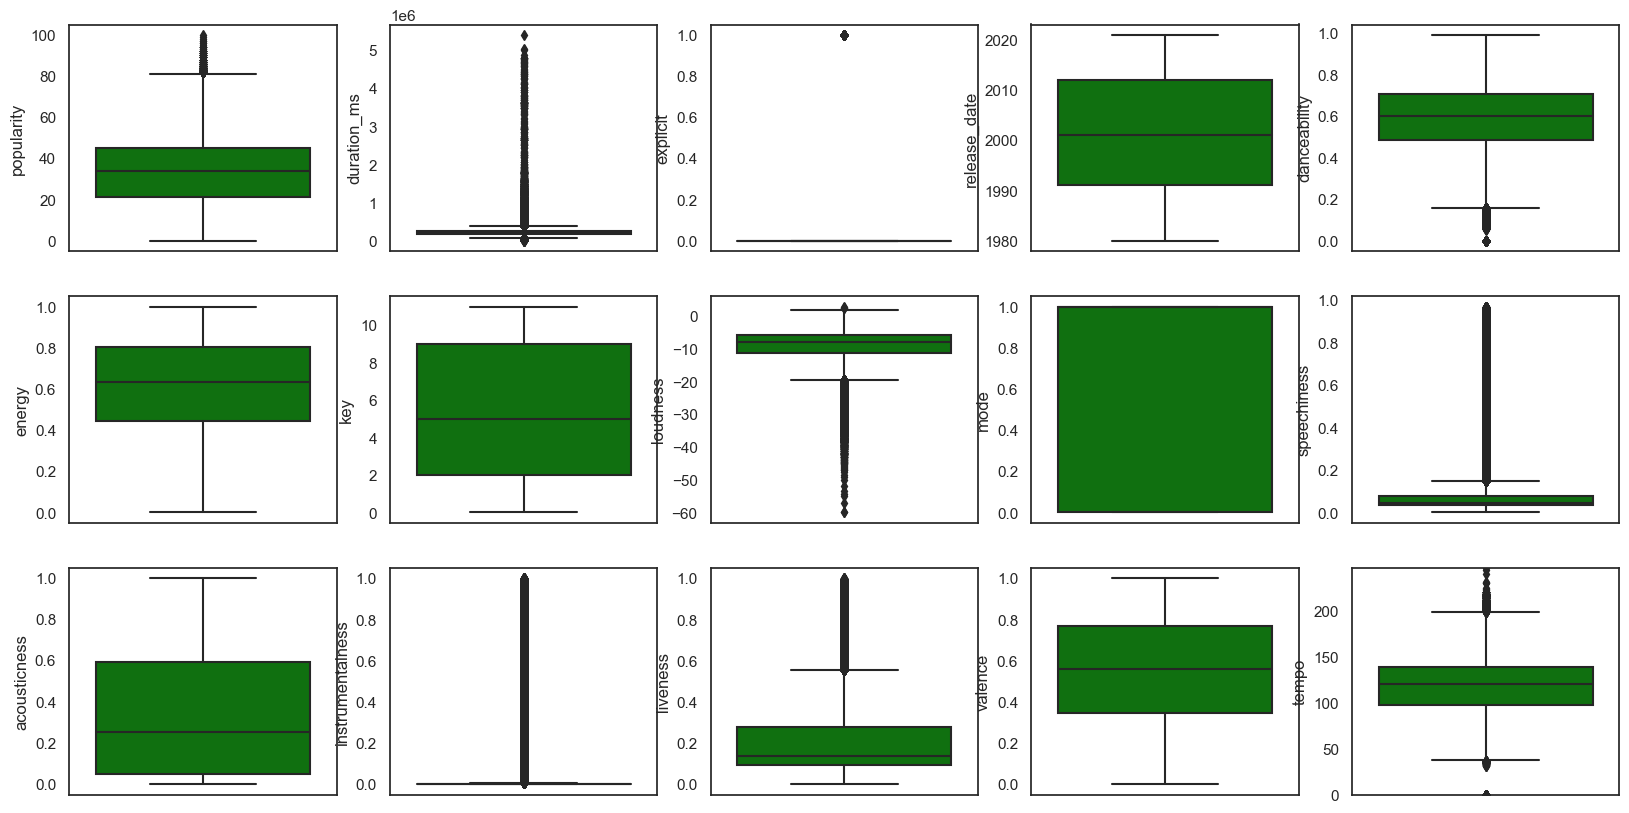

In [18]:
fig, axes = plt.subplots(3,5, figsize = (20,10))
a=0
for name in l:
    i,j = divmod(a, 5)
    sns.boxplot(y = newdf[name], ax = axes[i,j], color='green', showfliers=True)
    plt.ylim(newdf[name].min(),newdf[name].max())
    a += 1   

plt.tight_layout()
plt.show()

**Histograms**

IndexError: index 3 is out of bounds for axis 0 with size 3

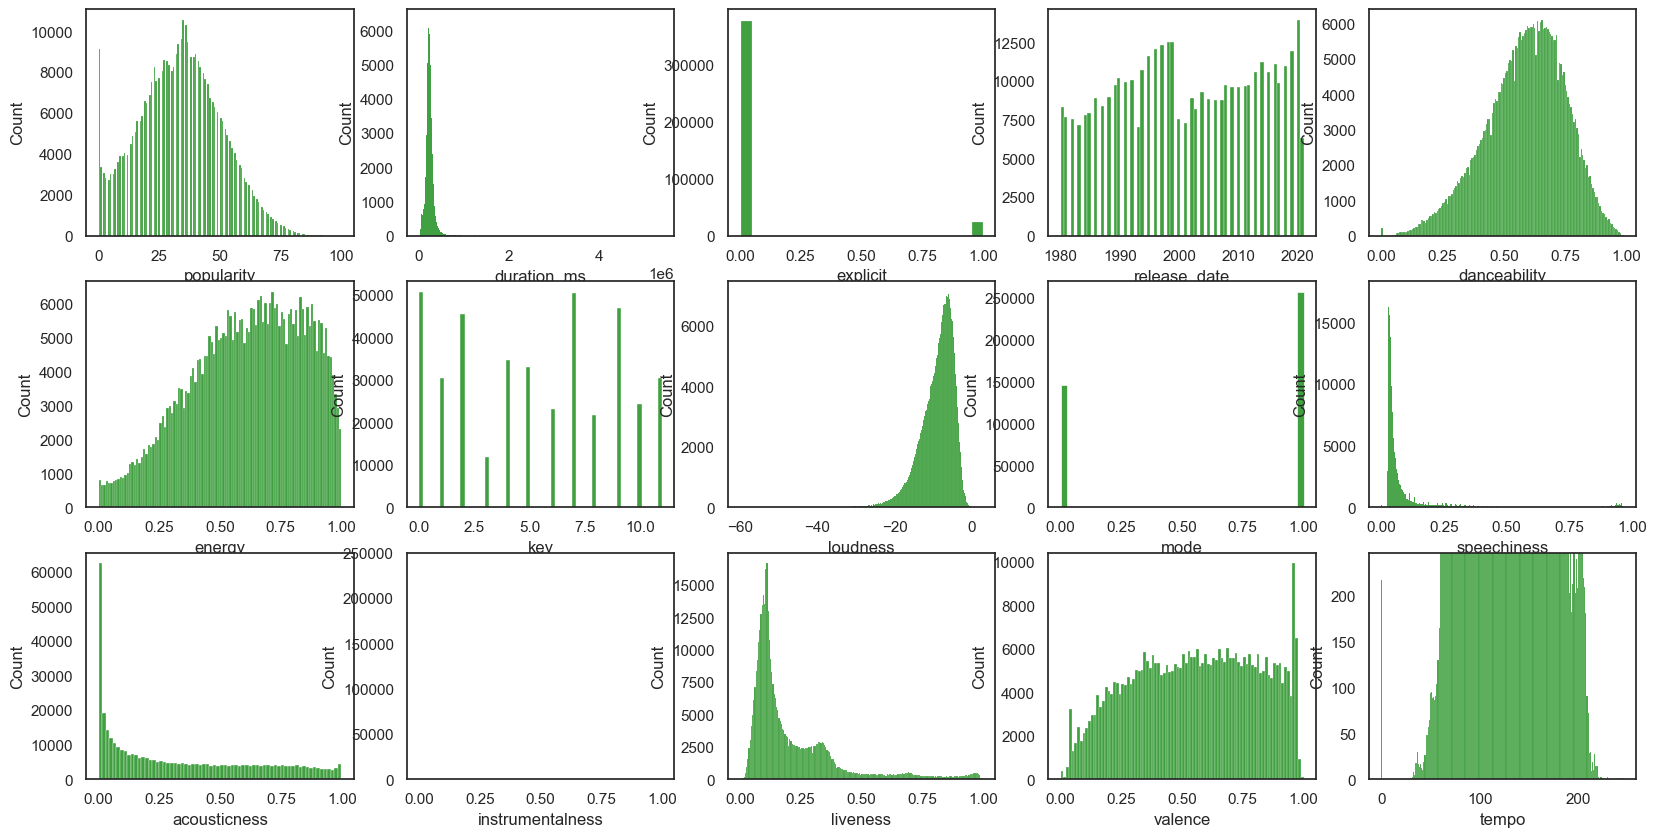

In [19]:
fig, axes = plt.subplots(3,5, figsize = (20,10))
a=0
for name in l:
    i,j = divmod(a, 5)
    sns.histplot(x = newdf[name], ax = axes[i,j], color='green')
    plt.ylim(newdf[name].min(),newdf[name].max())
    a += 1

plt.tight_layout()
plt.show()

In [ ]:
fig=make_subplots(rows=3,cols=3,subplot_titles=('<i>popularity', '<i>danceability', '<i>energy', '<i>loudness', '<i>speechiness', '<i>acousticness', '<i>liveness', '<i>valence', '<i>tempo'))
fig.add_trace(go.Histogram(x=tracks['popularity'],name='popularity'),row=1,col=1)
fig.add_trace(go.Histogram(x=tracks['danceability'],name='danceability'),row=1,col=2)
fig.add_trace(go.Histogram(x=tracks['energy'],name='energy'),row=1,col=3)
fig.add_trace(go.Histogram(x=tracks['loudness'],name='loudness'),row=2,col=1)
fig.add_trace(go.Histogram(x=tracks['speechiness'],name='speechiness'),row=2,col=2)
fig.add_trace(go.Histogram(x=tracks['acousticness'],name='acousticness'),row=2,col=3)
fig.add_trace(go.Histogram(x=tracks['liveness'],name='liveness'),row=3,col=1)
fig.add_trace(go.Histogram(x=tracks['valence'],name='valence'),row=3,col=2)
fig.add_trace(go.Histogram(x=tracks['tempo'],name='tempo'),row=3,col=3)
fig.update_layout(height=900,width=900,title_text='<b>Feature Distribution')
fig.update_layout(template='plotly_dark',title_x=0.5)

In [ ]:
px.scatter(tracks,x='energy',y='danceability',color='danceability',color_continuous_scale=px.colors.sequential.Plotly3,template='plotly_dark',title='<b>Energy Versus Danceability')

In [ ]:
fig=px.area(tracks.groupby('release_date',as_index=False).count().sort_values(by='name',ascending=False).sort_values(by='release_date'),x='release_date',y='name',markers=True,labels={'release_date':'Total songs'},color_discrete_sequence=['green'],title='<b>Year by Year Songs collection')
fig.update_layout(hovermode='x',title_x=0.5)

In [21]:
tracks.popularity.value_counts()

35     10553
36     10322
34      9613
37      9457
33      9380
       ...  
93         2
95         1
100        1
99         1
98         1
Name: popularity, Length: 101, dtype: int64

In [22]:
tracks.release_date.describe()

count    403501.000000
mean       2001.326294
std          11.943512
min        1980.000000
25%        1991.000000
50%        2001.000000
75%        2012.000000
max        2021.000000
Name: release_date, dtype: float64

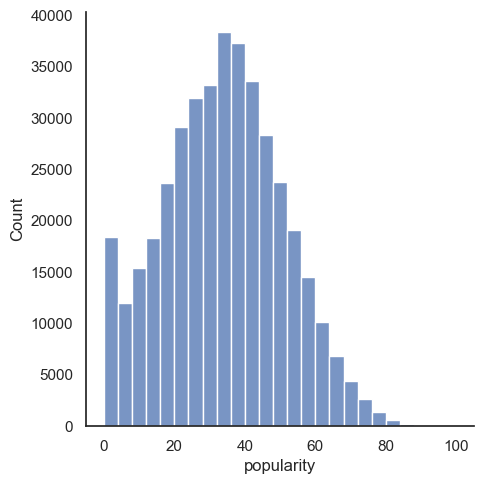

In [23]:
sns.displot(tracks.popularity, color="b", bins=25)

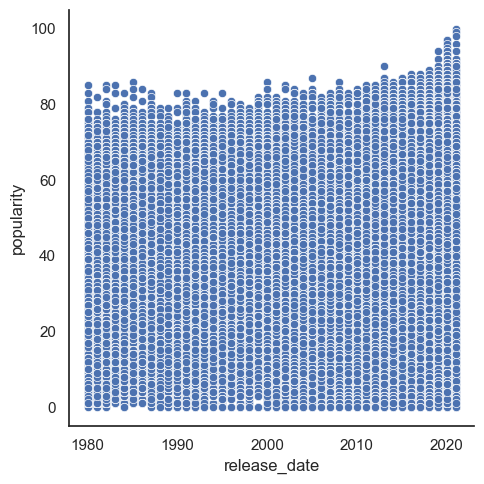

In [24]:
sns.relplot(data=tracks, x="release_date", y="popularity")